In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# --- List of your CSV files ---
# IMPORTANT: Make sure these paths are correct for your files.
# For example, if your files are directly in the same folder as your script:
# csv_files = ['data_1.csv', 'data_2.csv', 'data_3.csv']
csv_files = [
    '20250714/nova/nova_1903864_metric.csv',
    '20250714/nova/nova_1903865_metric.csv',
    '20250714/nova/nova_1903866_metric.csv',
    '20250714/orion/orion_1903860_metric.csv',
    '20250714/orion/orion_1903861_metric.csv',
    '20250714/orion/orion_1903862_metric.csv',
    '20250714/taurus/taurus_1903712_metric.csv',
    '20250714/taurus/taurus_1903716_metric.csv',
    '20250714/taurus/taurus_1903856_metric.csv'
]

# --- Column Names ---
# These should match the actual column names in your CSVs
VALUE_COL = 'value'
DEVICE_ID_COL = 'device_id'

# List to store processed DataFrames
processed_dataframes = []

print("--- Loading and Processing CSV Files ---")
for file_path in csv_files:
    if not os.path.exists(file_path):
        print(f"Error: File '{file_path}' not found. Please check the path and filename.")
        continue # Skip this file and proceed to the next one

    try:
        # Read the CSV file into a DataFrame
        df = pd.read_csv(file_path)

        # Ensure 'value' column is numeric
        # errors='coerce' will turn non-numeric values into NaN (Not a Number)
        df[VALUE_COL] = pd.to_numeric(df[VALUE_COL], errors='coerce')

        # Drop rows with NaN in the 'value' or 'device_id' columns to avoid plotting errors
        df_cleaned = df.dropna(subset=[VALUE_COL, DEVICE_ID_COL])

        if not df_cleaned.empty:
            processed_dataframes.append(df_cleaned)
            print(f" - '{os.path.basename(file_path)}' loaded successfully. First 2 rows:")
            display(df_cleaned.head(2))
        else:
            print(f"Warning: '{os.path.basename(file_path)}' contains no valid data after cleaning. Skipping.")

    except Exception as e:
        print(f"Error processing '{os.path.basename(file_path)}': {e}")

if not processed_dataframes:
    print("\nNo CSV files were successfully loaded and processed. Please ensure files exist and contain valid data.")

--- Loading and Processing CSV Files ---
 - 'nova_1903864_metric.csv' loaded successfully. First 2 rows:


,timestamp,device_id,metric_id,value
0,2025-07-12T09:19:07+02:00,nova-9,wattmetre_power_watt,68.038095
1,2025-07-12T09:19:08+02:00,nova-9,wattmetre_power_watt,65.545238


 - 'nova_1903865_metric.csv' loaded successfully. First 2 rows:


,timestamp,device_id,metric_id,value
0,2025-07-12T09:19:07+02:00,nova-8,wattmetre_power_watt,68.880952
1,2025-07-12T09:19:08+02:00,nova-8,wattmetre_power_watt,67.335714


 - 'nova_1903866_metric.csv' loaded successfully. First 2 rows:


,timestamp,device_id,metric_id,value
0,2025-07-12T09:19:07+02:00,nova-7,wattmetre_power_watt,73.080952
1,2025-07-12T09:19:08+02:00,nova-7,wattmetre_power_watt,74.538095


 - 'orion_1903860_metric.csv' loaded successfully. First 2 rows:


,timestamp,device_id,metric_id,value
0,2025-07-12T09:17:06+02:00,orion-3,wattmetre_power_watt,94.297561
1,2025-07-12T09:17:07+02:00,orion-3,wattmetre_power_watt,97.572973


 - 'orion_1903861_metric.csv' loaded successfully. First 2 rows:


,timestamp,device_id,metric_id,value
0,2025-07-12T09:20:35+02:00,orion-4,wattmetre_power_watt,90.10000
1,2025-07-12T09:20:36+02:00,orion-4,wattmetre_power_watt,97.71087


 - 'orion_1903862_metric.csv' loaded successfully. First 2 rows:


,timestamp,device_id,metric_id,value
0,2025-07-12T09:20:22+02:00,orion-1,wattmetre_power_watt,102.758537
1,2025-07-12T09:20:22.568423+02:00,orion-1,bmc_node_power_watt,168.000000


 - 'taurus_1903712_metric.csv' loaded successfully. First 2 rows:


,timestamp,device_id,metric_id,value
0,2025-07-11T21:15:50+02:00,taurus-10,wattmetre_power_watt,98.583721
1,2025-07-11T21:15:50.248604+02:00,taurus-10,bmc_node_power_watt,112.000000


 - 'taurus_1903716_metric.csv' loaded successfully. First 2 rows:


,timestamp,device_id,metric_id,value
0,2025-07-11T21:27:07+02:00,taurus-11,wattmetre_power_watt,74.528000
1,2025-07-11T21:27:08+02:00,taurus-11,wattmetre_power_watt,81.907143


 - 'taurus_1903856_metric.csv' loaded successfully. First 2 rows:


,timestamp,device_id,metric_id,value
0,2025-07-12T09:15:17+02:00,taurus-4,wattmetre_power_watt,80.657143
1,2025-07-12T09:15:17.439696+02:00,taurus-4,bmc_node_power_watt,98.000000



--- Generating the Combined Plot ---


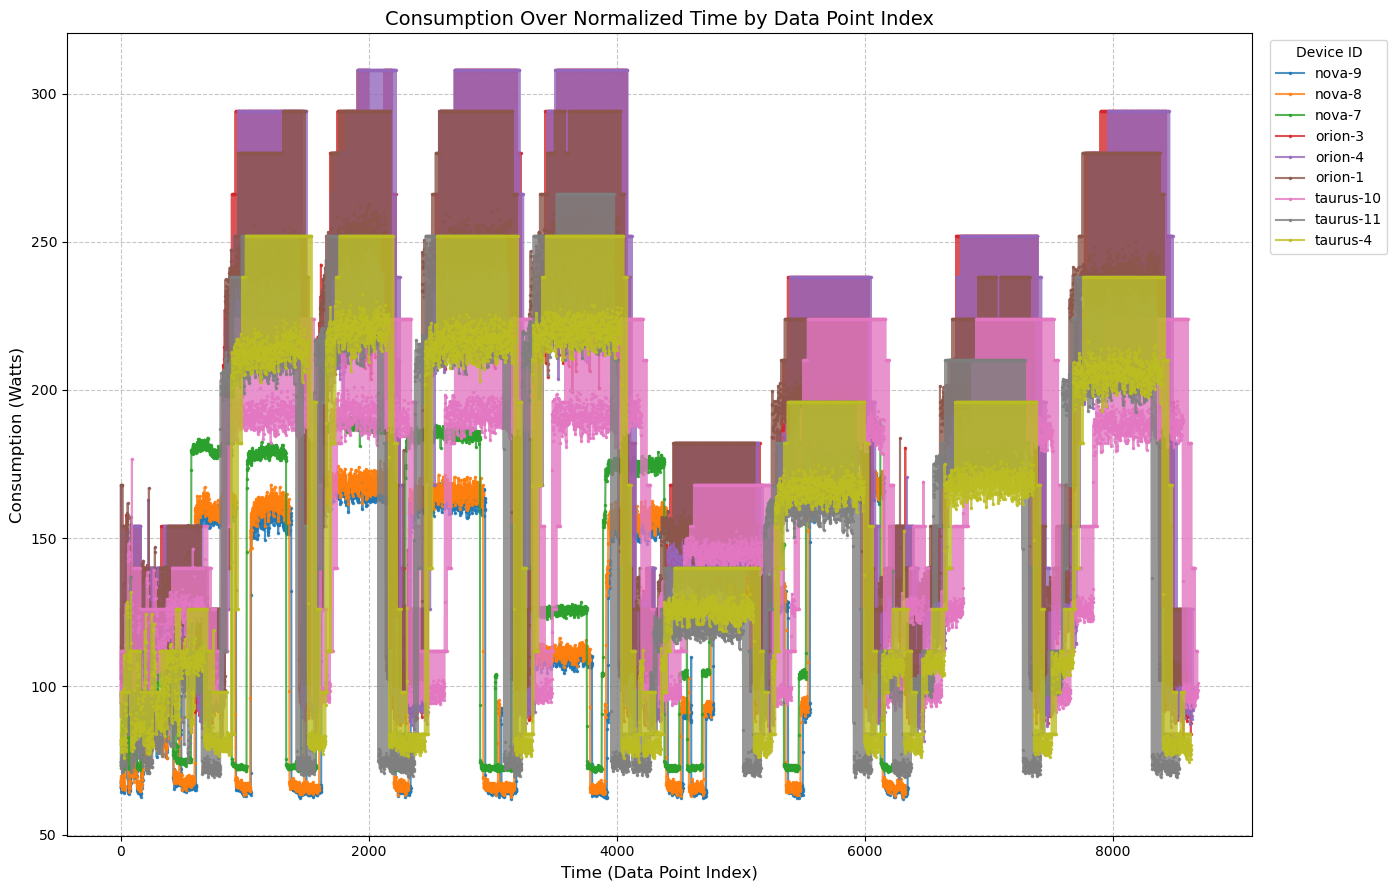


Plotting process completed.


In [11]:
print("\n--- Generating the Combined Plot ---")

if not processed_dataframes:
    print("No data available to plot. Please check previous steps.")
else:
    # Create a figure with a 16:9 aspect ratio
    plt.figure(figsize=(16, 9))

    # Iterate over each processed DataFrame and plot
    for i, df in enumerate(processed_dataframes):
        # The x-axis will simply be the DataFrame's index, which starts at 0
        x_axis_data = df.index

        # Get the label for the legend (device_id)
        # We assume 'device_id' is constant within a CSV file, so we take the first one.
        # Use a fallback label if device_id is missing or the DataFrame is empty.
        label_name = df[DEVICE_ID_COL].iloc[0] if not df.empty and DEVICE_ID_COL in df.columns else f"File {i+1}"
        
        # Plot the data
        plt.plot(x_axis_data, df[VALUE_COL],
                 label=label_name,       # Label for the legend
                 marker='.',             # Small dots at each data point
                 linestyle='-',          # Connect points with a line
                 markersize=3,           # Size of the markers
                 alpha=0.8)              # Transparency for overlapping lines

    # Add labels and title to the plot
    plt.xlabel('Time (Data Point Index)', fontsize=12) # Clear label for x-axis
    plt.ylabel('Consumption (Watts)', fontsize=12)   # Y-axis label (customize as needed)
    plt.title('Consumption Over Normalized Time by Data Point Index', fontsize=14) # Plot title

    # Add a legend to identify each line by device_id
    # Placing the legend outside the plot area helps prevent it from obscuring data
    plt.legend(title='Device ID', bbox_to_anchor=(1.01, 1), loc='upper left')

    # Add a grid for easier readability
    plt.grid(True, linestyle='--', alpha=0.7)

    # Adjust plot layout to make space for the external legend
    plt.tight_layout(rect=[0, 0, 0.88, 1]) # rect adjusts the plot area; 0.88 means 88% of width for plot
    plt.show()

print("\nPlotting process completed.")